<div style="text-align: center;">
    <h1><strong>CAPSTONE 2</strong></h1>
    <p><em>ANNISA DITASILA</em></p>
    <p><em>DTIDS - 0106</em></p>
</div>


***


# **I. BUSINESS UNDERSTANDING**


## SaaS Sales through Amazon: Maximizing Efficiency and Growth


SAAS-sales AWS is a Software as a Service (SaaS) company that specializes in providing sales solutions through the Amazon platform. Operating within the expansive e-commerce industry, they leverage technology and data analysis to enhance operational efficiency and drive growth opportunities for businesses. Despite facing intense competition in the e-commerce landscape, SAAS-sales AWS stands out by offering software solutions tailored to the unique challenges and opportunities within the Amazon ecosystem and offers a range of tools and services designed to help businesses optimize their sales performance on Amazon, including analytics dashboards, inventory management systems, and marketing automation tools.


## Objectives 
Utilize analytical techniques to examine the relationships between sales-related variables, product performance, customer impact, geographical prospects and optimize pricing strategies

<!-- ## Actionable Insights: 
1. Optimize Pricing Strategies
2. High Growth Products
3. Strengthen Key Customer Relationships
4. High Potential Regions -->

## Analytical Aproaches
**Variable Correlation Analysis** : identifying and analyzing the strength and direction of relationships between various sales-related variables. By understanding how different factors such as price, discount rates, and customer demographics interact.

**Product Influence Analysis** : identifies products with high growth potential, pinpoints products that contribute less to overall sales, which may need re-evaluation or discontinuation. 

**Customer Attributes Influence Analysis** : identifies customers who have the highest and lowest impact on sales.

**Geographical Influence Analysis** examines how product prospects vary by region, subregion, country, and city.

***


# **II. DATA UNDERSTANDING**

### IMPORT LIBRARIES

In [3]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### IMPORT DATASET

In [4]:
# IMPORT DATASET

df = pd.read_csv('SaaS-Sales.csv')
df.head(2)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820


### DATASET CHARACTERISTICS

In [5]:
df.shape

(9994, 19)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

<div style="text-align: center;">
    <p><em>AWS SaaS Sales</em></p>
    <p><em>This dataset contains transaction data from a fictitious SaaS company selling sales and marketing software to other companies (B2B). In the dataset, each row represents a product in a transaction, and the columns include:</em></p>
</div>


| Column Name        | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| Row ID             | A unique identifier for each transaction.                                    |
| Order ID           | A unique identifier for each order.                                          |
| Order Date         | The date when the order was placed.                                          |
| Date Key           | A numerical representation of the order date (YYYYMMDD).                     |
| Contact Name       | The name of the person who placed the order.                                 |
| Country            | The country where the order was placed.                                      |
| City               | The city where the order was placed.                                         |
| Region             | The region where the order was placed.                                       |
| Subregion          | The subregion where the order was placed.                                    |
| Customer           | The name of the company that placed the order.                               |
| Customer ID        | A unique identifier for each customer.                                       |
| Industry           | The industry the customer belongs to.                                        |
| Segment            | The customer segment (SMB, Strategic, Enterprise, etc.).                     |
| Product            | The product that was ordered.                                                |
| License            | The license key for the product.                                             |
| Sales              | The total sales amount for the transaction.                                  |
| Quantity           | The total number of items in the transaction.                                |
| Discount           | The discount applied to the transaction.                                     |
| Profit             | The profit from the transaction.                                             |




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [8]:
# SUMMARY STATISTICS

df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


***


# **III. DATA CLEANING AND MANIPULATION**

> Selecting relevant data for analysis and eliminating irrelevant information based on objectives.

> Based on Data Exploration, there is no missing values in a dataset

In [9]:
pd.DataFrame({
    'columns'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value'        : df.isna().sum(),
    'n_unique'          : df.nunique().values,
    'duplicate'         : df.duplicated().sum()}
).round(3).reset_index().drop(labels='index', axis=1)

,columns,data_type,null_value,n_unique,duplicate
0,Row ID,int64,0,9994,0
1,Order ID,object,0,5009,0
2,Order Date,object,0,1237,0
3,Date Key,int64,0,1237,0
4,Contact Name,object,0,793,0
5,Country,object,0,48,0
6,City,object,0,262,0
7,Region,object,0,3,0
8,Subregion,object,0,12,0
9,Customer,object,0,99,0


In [10]:
# Changing order date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

print(df['Order Date'].dtypes)

datetime64[ns]


In [11]:
# DELETE UNUSED COLUMNS (ex. Date key = Order Date, Row ID, Order ID, Contact Name, Customer ID)

df.drop(['Row ID','Order ID','Date Key', 'Contact Name' , 'Customer ID'], axis=1, inplace=True) # using drop function

df.head(2)


,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820


In [12]:
# CHANGE COLUMNS NAME TO LOWER CASE

df.columns = df.columns.str.lower()

df.head(2)

,order date,country,city,region,subregion,customer,industry,segment,product,license,sales,quantity,discount,profit
0,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820


In [13]:
# change column name order date == date

df.rename(columns={'order date':'date'}, inplace=True)
df.head(2)

,date,country,city,region,subregion,customer,industry,segment,product,license,sales,quantity,discount,profit
0,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820


In [14]:
# extraxt year column

df['year'] = pd.DatetimeIndex(df['date']).year
df.head(2)

,date,country,city,region,subregion,customer,industry,segment,product,license,sales,quantity,discount,profit,year
0,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136,2022
1,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820,2022


***


### OUTLIERS

In [15]:
# FINDING OUTLIERS 

def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Calculate outlier ratio
    outlier_ratio = round(outliers[column].count() / df[column].count(), 2)
    
    return df[column].count(), outliers[column].count(), outlier_ratio

# Finding outliers for each column
columns = ['sales', 'profit', 'discount', 'quantity']
stats = {col: calculate_outliers(df, col) for col in columns}

# Create a DataFrame from the results
outlier_ratios = {f'outlier_ratio_{col}': stats[col][2] for col in columns}
outlier_ratio_df = pd.DataFrame(outlier_ratios, index=['ratio']).transpose().sort_values(by='ratio', ascending=False)
outlier_ratio_df


,ratio
outlier_ratio_profit,0.19
outlier_ratio_sales,0.12
outlier_ratio_discount,0.09
outlier_ratio_quantity,0.02


| Outlier Type      | Outlier Ratio  | Explanation                                                                                           |
|-------------------|----------------|-------------------------------------------------------------------------------------------------------|
| Profit            | 19%            | About 19% of the profit data stands out as unusual, indicating significant variability or some really high or low profit values.                   |
| Sales             | 12%            | Roughly 12% of sales figures are considered outliers. While not as extreme as profit outliers, these values still have a noticeable impact on the overall sales data.   |
| Discounts         | 9%             | Discounts show around 9% of their values as outliers. While not as common as profit or sales outliers, they still represent significant deviations from the norm. |
| Quantity          | 2%             | Only around 2% of quantity values are outliers, indicating a relatively stable dataset with very few extreme values.                                             |


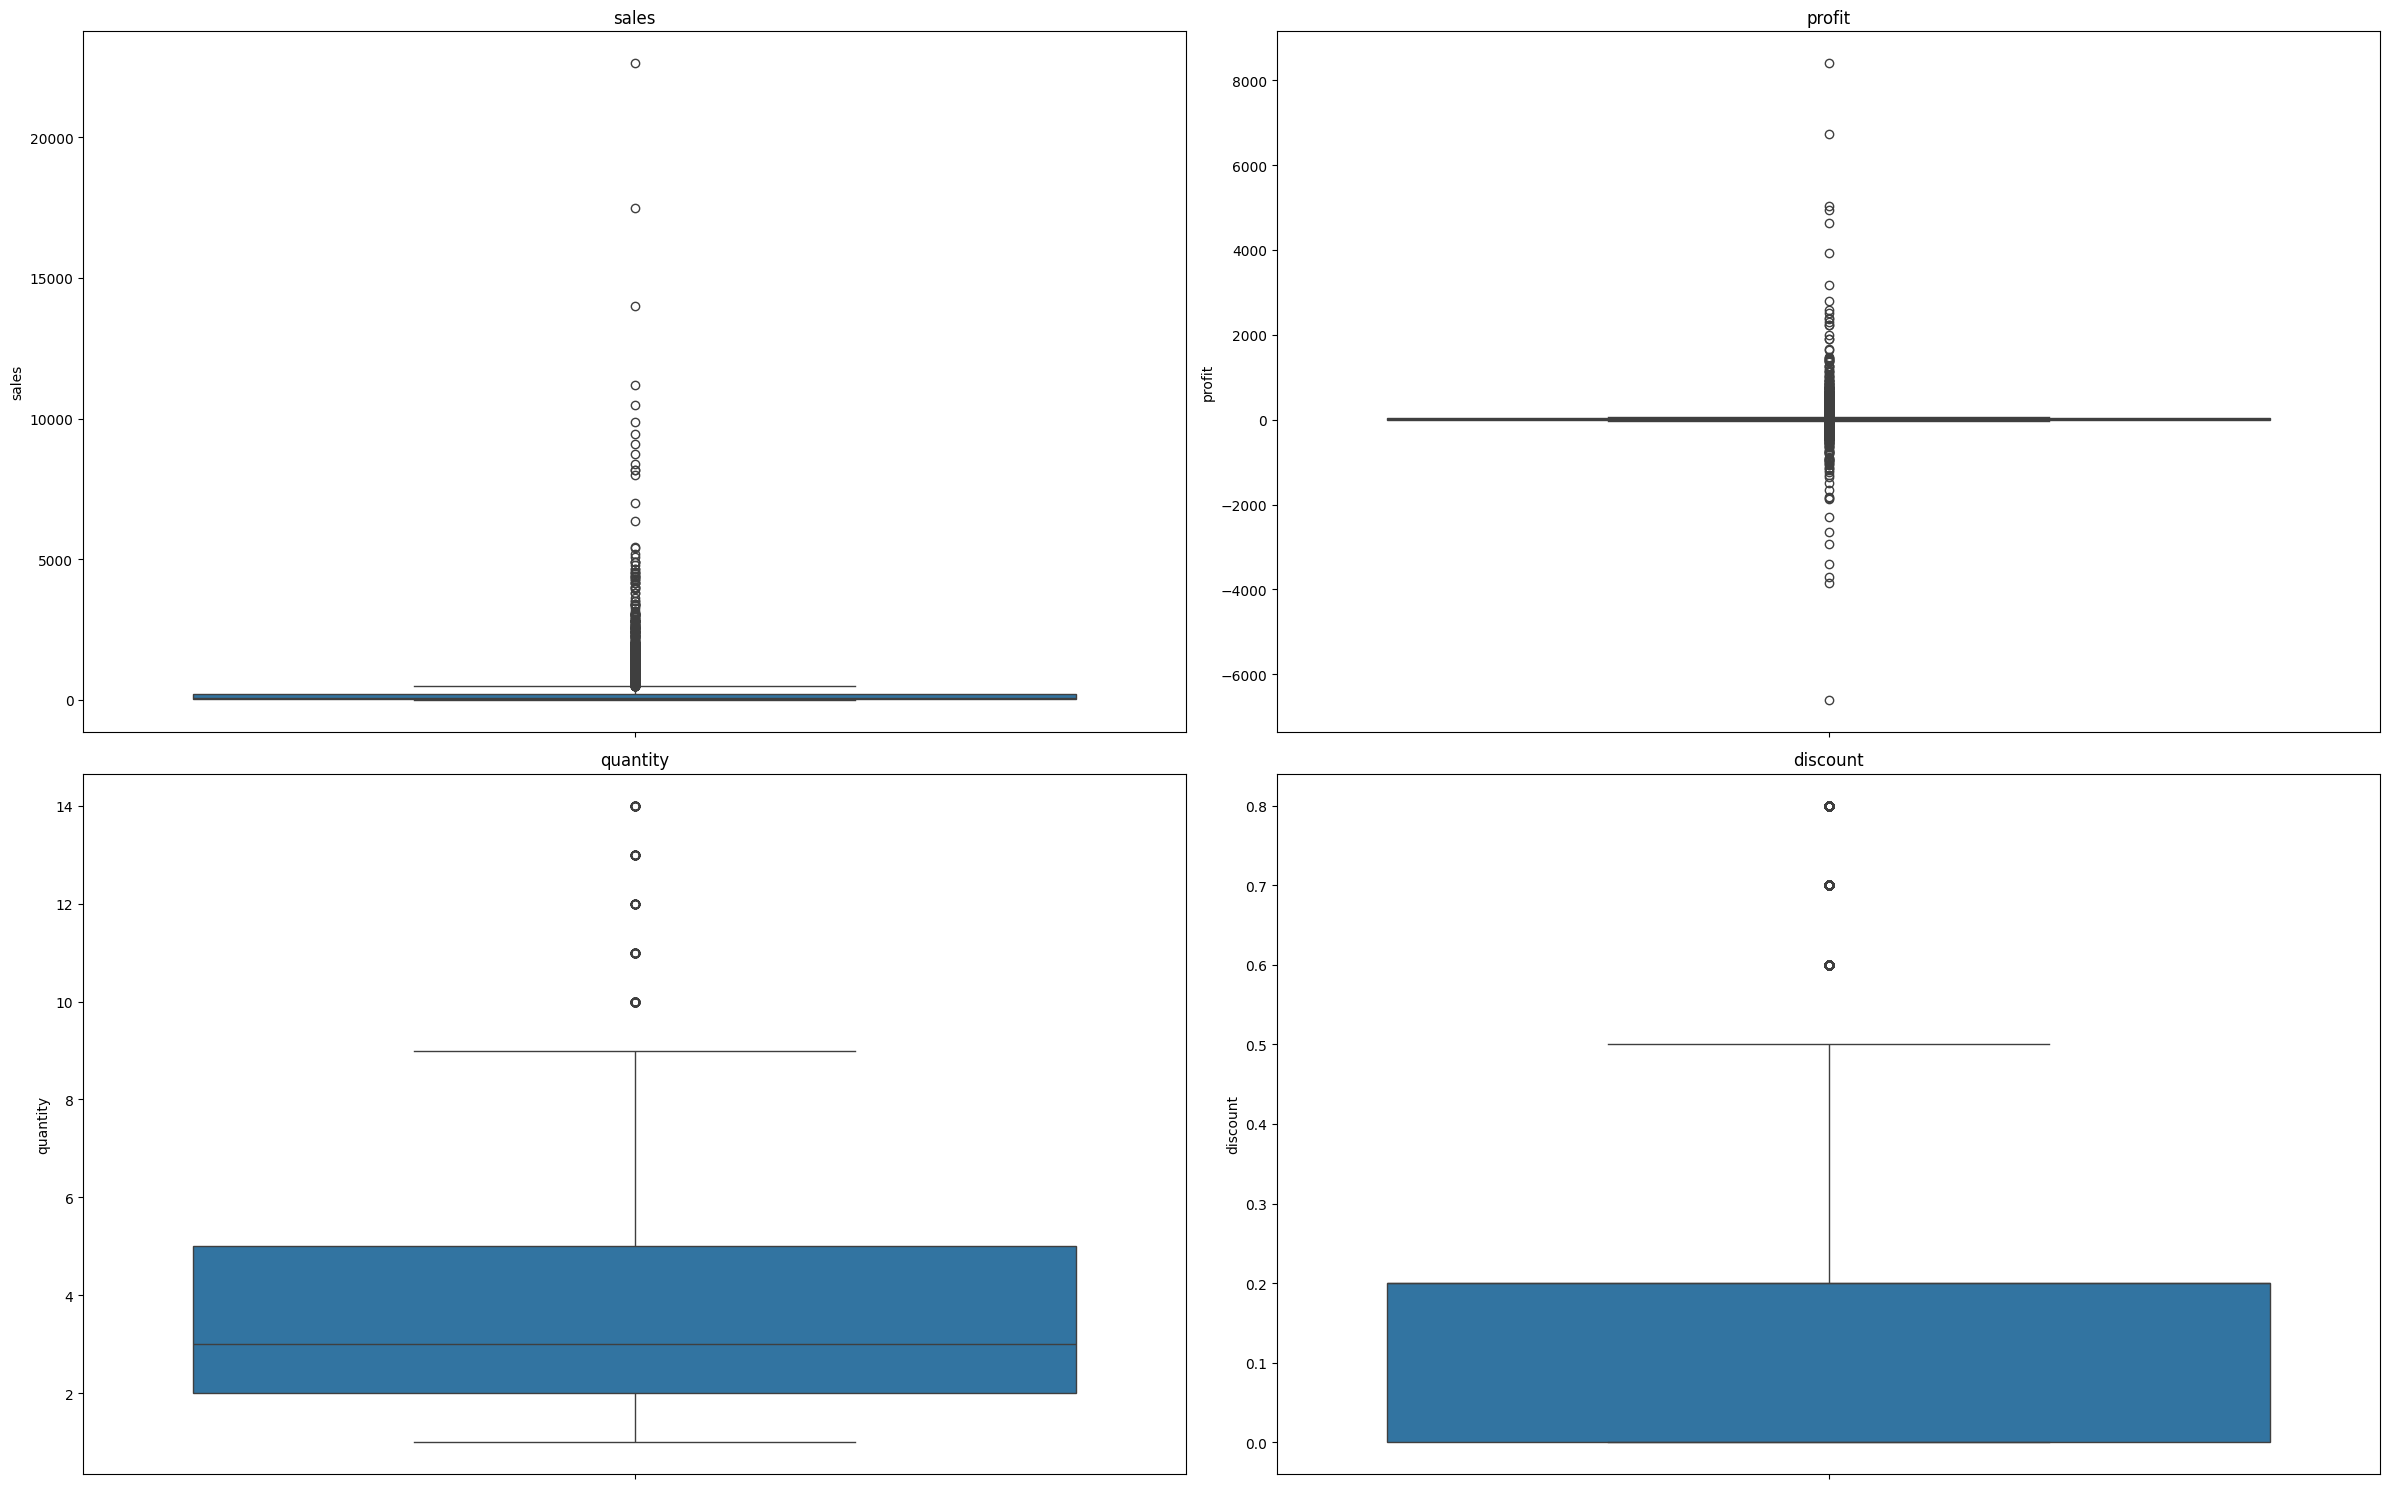

In [16]:
# OUTLIERS VISUALIZATION

# Create subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(24, 15))

# Box plot for sales (horizontal)
sns.boxplot(y=df['sales'], ax=axes[0, 0])
axes[0, 0].set_title('sales')

# Box plot for profit (horizontal)
sns.boxplot(y=df['profit'], ax=axes[0, 1])
axes[0, 1].set_title('profit')

# Box plot for quantity (horizontal)
sns.boxplot(y=df['quantity'], ax=axes[1, 0])
axes[1, 0].set_title('quantity')

# Box plot for discount (horizontal)
sns.boxplot(y=df['discount'], ax=axes[1, 1])
axes[1, 1].set_title('discount')

plt.tight_layout()
plt.show()

In [17]:
# FUNCTION FOR DETECTION OUTLIERS

def detect_intersect_outliers(df, columns):
    if not columns:
        return pd.DataFrame()

    # Initialize the mask with True values
    intersect_mask = pd.Series([True] * len(df), index=df.index)
    
    for column in columns:
        # Calculate quartiles
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        
        # Calculate IQR
        iqr = q3 - q1
        
        # Find outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Create a mask for outliers in the current column
        column_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        
        # Update the intersect mask
        intersect_mask &= column_mask

    # Filter the original dataframe to get only the intersect outliers
    intersect_outliers_df = df[intersect_mask]
    
    return intersect_outliers_df



In [18]:
# SHOWING INTERSECT OUTLIERS FROM COLUMNS CHOICES

intersect_outliers = detect_intersect_outliers(df, ['sales', 'discount', 'quantity', 'profit'])
intersect_outliers

,date,country,city,region,subregion,customer,industry,segment,product,license,sales,quantity,discount,profit,year
341,2020-04-13,France,Paris,EMEA,EU-WEST,General Motors,Manufacturing,Strategic,ContactMatcher,CDPVLL2H9E,509.97,10,0.7,-407.976,2020


___

# **IV. EXPLORATORY DATA ANALYSIS (EDA)**

array([[<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'discount'}>,
        <Axes: title={'center': 'profit'}>]], dtype=object)

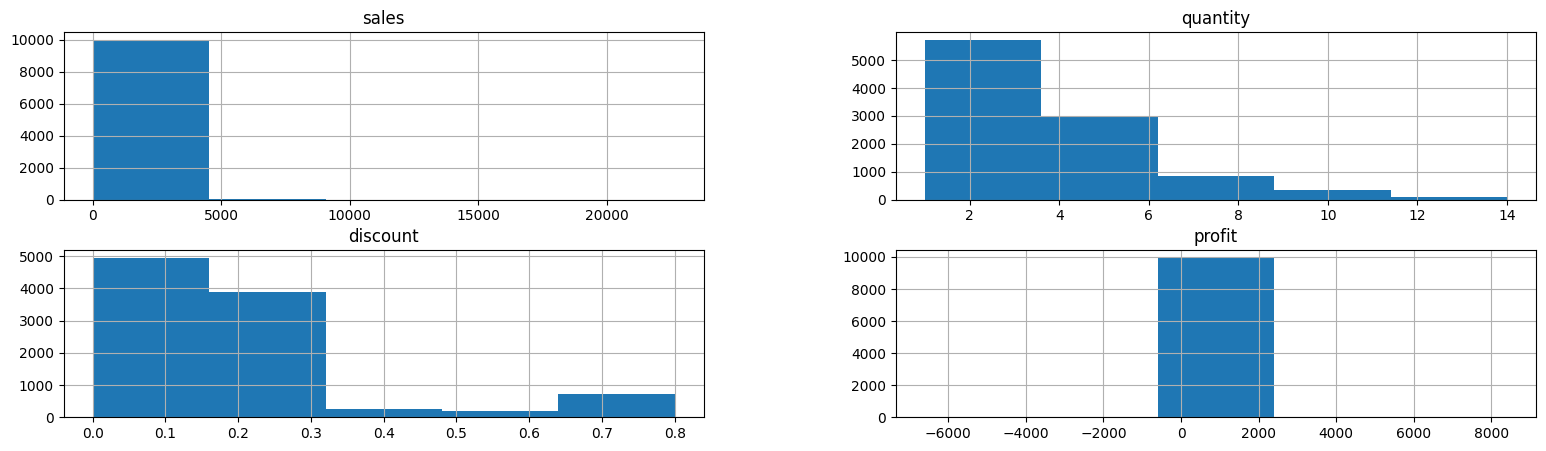

In [19]:
# DATA DISTRIBUTION

df[['sales', 'quantity', 'discount', 'profit']].hist(bins=5, figsize=(19,5))

In [20]:
# SKEWNESS

df[['sales', 'quantity', 'discount', 'profit']].skew()

sales       12.972752
quantity     1.278545
discount     1.684295
profit       7.561432
dtype: float64

## IV.I  Variable Correlation Analysis



In [21]:
# Correlation matrix
correlation_matrix = df[['sales', 'quantity', 'discount', 'profit']].corr()

# Apply mask to correlation matrix
lower_triangle = np.tril(np.ones_like(correlation_matrix, dtype=bool), k=-1)
lower_triangle = correlation_matrix.where(lower_triangle)

lower_triangle

,sales,quantity,discount,profit
sales,NaN,NaN,NaN,NaN
quantity,0.200795,NaN,NaN,NaN
discount,-0.028190,0.008623,NaN,NaN
profit,0.479064,0.066253,-0.219487,NaN


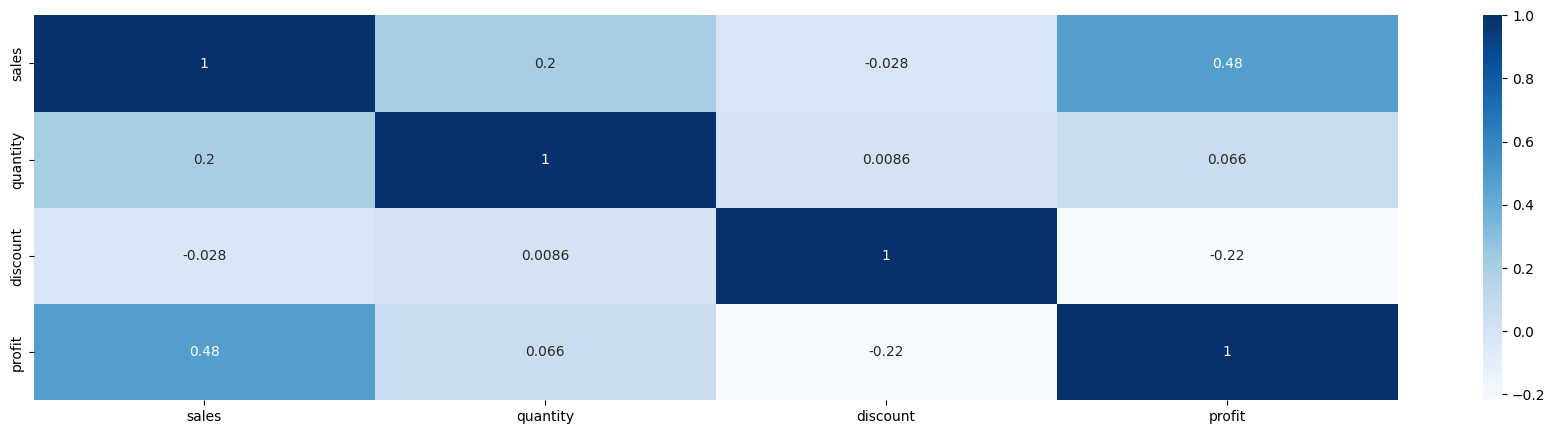

In [22]:
# CORRELATION ANALYSIS USING HEATMAP


plt.figure(figsize=(22, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

**CORRELATION ANALYSIS**

| Relationship                 | Correlation Coefficient | Description                                                                                              |
|------------------------------|-------------------------|----------------------------------------------------------------------------------------------------------|
| Sales and Quantity           | 0.20                    | There is a positive correlation, indicating that as sales increase, the quantity sold also tends to increase, albeit moderately. |
| Sales and Discount           | -0.03                   | A weak negative correlation suggests that there is a slight tendency for sales to decrease when discounts are applied, though the correlation is not strong. |
| Sales and Profit             | 0.48                    | A moderate positive correlation indicates that as sales increase, profits also tend to increase.        |
| Quantity and Discount        | 0.008                   | No clear correlation, indicating that changes in quantity sold are not strongly associated with changes in discount. |
| Quantity and Profit          | 0.07                    | A very weak positive correlation suggests a slight tendency for profit to increase with quantity sold, but the correlation is not significant. |
| Discount and Profit          | -0.22                   | A weak negative correlation indicates that as discounts increase, profits tend to decrease slightly, but the correlation is not very strong. |

## IV.II Product Influence Analysis

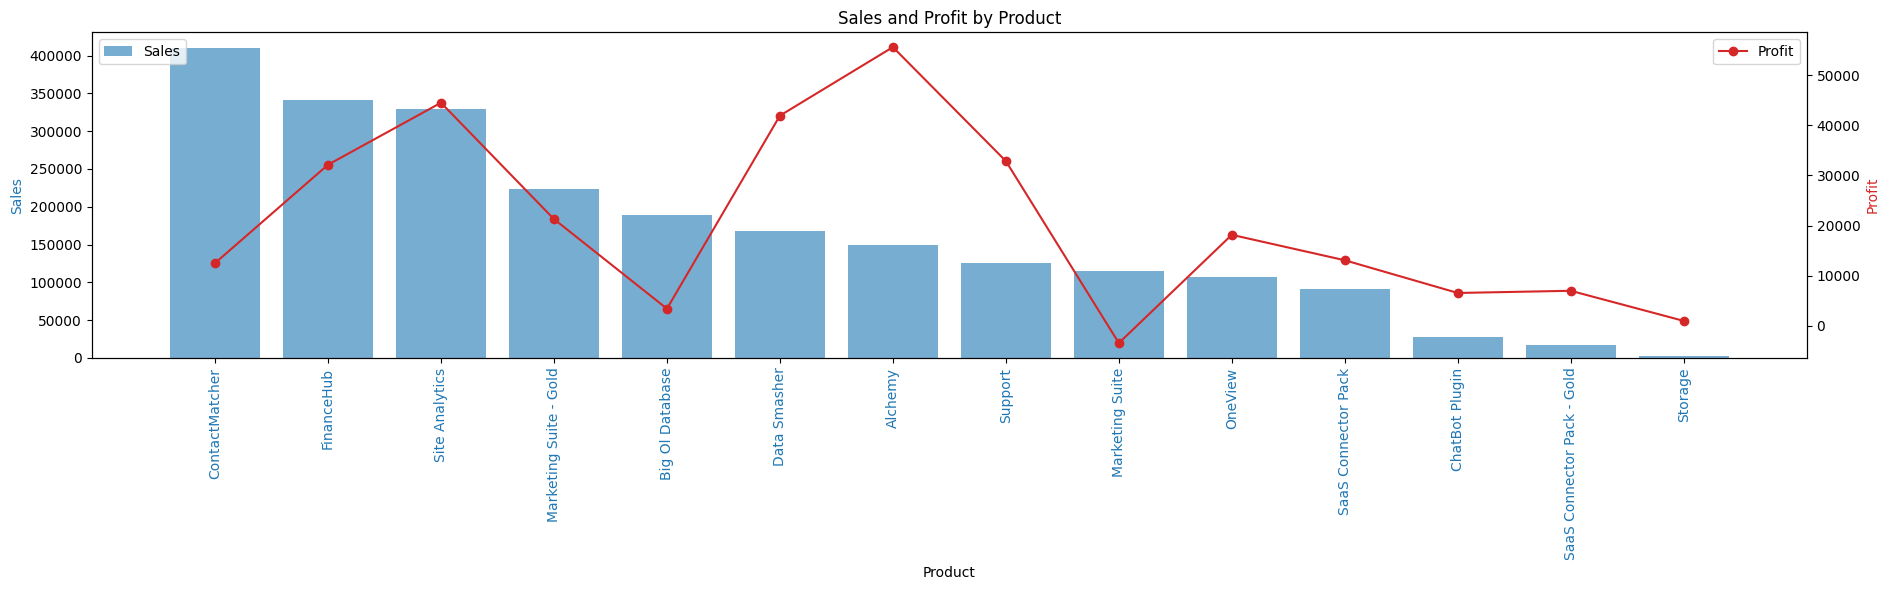

In [23]:
# SALES AND PROFIT ACCORDING TO THE PRODUCT

# GROUPING
sales_product = df.pivot_table(values='sales', index='product', aggfunc='sum').sort_values(by='sales', ascending=False) # pivotting for columns product based on sales performance
profit_product = df.pivot_table(values='profit', index='product', aggfunc='sum').sort_values(by='product', ascending=False) # pivotting for columns product based on profit performance
merged_df = pd.merge(sales_product, profit_product, on='product')

# Plotting
fig, ax1 = plt.subplots(figsize=(19, 6))
color = 'tab:blue'
ax1.set_xlabel('Product')
ax1.set_ylabel('Sales', color=color)
ax1.bar(merged_df.index, merged_df['sales'], color=color, alpha=0.6, label='Sales')
ax1.tick_params(axis='x', labelcolor=color, rotation=90)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Profit', color=color)
ax2.plot(merged_df.index, merged_df['profit'], color=color, marker='o', label='Profit')
ax2.tick_params(axis='x', labelcolor=color, rotation=90)
plt.title('Sales and Profit by Product')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

| Category                    | Product          | Metric         | Interpretation                                                                                          |
|-----------------------------|------------------|----------------|---------------------------------------------------------------------------------------------------------|
| Top Performers by Sales      | ContactMatcher   | Sales: $410,378.27 | Leading product in terms of sales volume.                                                          |
|                             | FinanceHub       | Sales: $340,935.42 | Another strong performer in sales.                                                                  |
|                             | Site Analytics   | Sales: $330,007.05 | Significant sales indicating good market acceptance.                                                |
| Top Performers by Profit     | Alchemy          | Profit: $55,617.82 | Most profitable product relative to others.                                                        |
|                             | Data Smasher     | Profit: $41,936.64 | Shows strong profitability.                                                                         |
|                             | Site Analytics   | Profit: $44,515.73 | High returns on sales, indicating efficient performance.                                            |


In [24]:
# SALES SEGMENTATION (LABEL PERFORMANCE OF SALES PER PRODUCT)

# GROUPING
sales_per_product = df.groupby('product')['sales'].sum().reset_index()

low_threshold = 0.33 * 410378.2650 # maximum value for sales
high_threshold = 0.66 * 410378.2650 # maximum value for sales

# Function to segment sales
def segment_sales(sales):
    if sales <= low_threshold:
        return 'Low'
    elif sales >= high_threshold:
        return 'High'
    else:
        return 'Medium'
    
# Apply segmentation
sales_per_product['sales_segment'] = sales_per_product['sales'].apply(segment_sales)

# Define the custom order
custom_order = ['High', 'Medium', 'Low']
# Convert 'sales_segment' to categorical data type with the custom order
sales_per_product['sales_segment'] = pd.Categorical(sales_per_product['sales_segment'], categories=custom_order, ordered=True)
# Sort the DataFrame by 'sales_segment' and 'sales'
sales_per_product.sort_values(by=['sales_segment', 'sales'], ascending=[True, False])


,product,sales,sales_segment
3,ContactMatcher,410378.2650,High
5,FinanceHub,340935.4150,High
11,Site Analytics,330007.0540,High
7,Marketing Suite - Gold,223843.6080,Medium
1,Big Ol Database,189238.6310,Medium
4,Data Smasher,167380.3180,Medium
0,Alchemy,149528.0300,Medium
13,Support,125152.7440,Low
6,Marketing Suite,114879.9963,Low
8,OneView,107532.1610,Low


In [25]:
# DEFINING RANGE VALUE FOR SALES SEGMENTATION PER PRODUCT

print('category of low sales is below: ', low_threshold)
print('category of high sales is above: ', high_threshold)
print('Category of medium sales are between: ', low_threshold, 'and', high_threshold)


category of low sales is below:  135424.82745
category of high sales is above:  270849.6549
Category of medium sales are between:  135424.82745 and 270849.6549



| Sales Segment         | Products                      | Recommendations                                                                                      |
|-----------------------|-------------------------------|------------------------------------------------------------------------------------------------------|
| High                  | ContactMatcher, FinanceHub, Site Analytics | Continue to support and enhance these products. Leverage their success for cross-promotion.        |
| Medium                | Marketing Suite - Gold, Big Ol Database, Data Smasher, Alchemy | Analyze performance. Consider marketing strategies or feature enhancements to boost sales.       |
| Low                   | Marketing Suite, OneView, SaaS Connector Pack, ChatBot Plugin, SaaS Connector Pack - Gold, Storage | Conduct detailed market analysis to understand low sales. Consider strategic pivots or marketing campaigns. Evaluate the product's market fit. |



In [26]:
# RATIO TOTAL PROFIT AND SALES

# GROUPING
ratio = df.groupby('product')[['sales','profit']].sum()


# The proportion of total profit to total sales for each product
ratio['ratio_profit'] = 100* (ratio['profit']/ratio['sales']).apply(lambda x: x if x > 0 else 0)

ratio

,sales,profit,ratio_profit
product,,,
Alchemy,149528.0300,55617.8249,37.195585
Big Ol Database,189238.6310,3384.7569,1.788618
ChatBot Plugin,27118.7920,6527.7870,24.071083
ContactMatcher,410378.2650,12496.2822,3.045064
Data Smasher,167380.3180,41936.6357,25.054700
FinanceHub,340935.4150,32136.4203,9.425955
Marketing Suite,114879.9963,-3472.5560,0.000000
Marketing Suite - Gold,223843.6080,21278.8264,9.506113
OneView,107532.1610,18138.0054,16.867517


 High Profitability
| Product                    | Profit Ratio (%) | Interpretation                                  |
|----------------------------|------------------|-------------------------------------------------|
| Alchemy                    | 37.20            | Efficient revenue generation relative to sales. High profitability. |
| SaaS Connector Pack - Gold | 42.27            | Excellent cost efficiency. Very high profitability. |
| Storage                    | 31.40            | Effective cost management. Healthy profit ratio. |
| Support                    | 26.26            | High profitability.                            |

 Moderate Profitability
| Product                    | Profit Ratio (%) | Interpretation                                  |
|----------------------------|------------------|-------------------------------------------------|
| ChatBot Plugin             | 24.07            | Reasonable efficiency in profit generation. Moderate profitability. |
| Data Smasher               | 25.05            | Reflects efficient profitability. Moderate profitability. |
| Marketing Suite - Gold     | 9.51             | Reasonable profitability.                      |
| OneView                    | 16.87            | Effective profitability.                       |
| FinanceHub                 | 9.43             | Room for optimization.                        |

 Low Profitability
| Product                    | Profit Ratio (%) | Interpretation                                  |
|----------------------------|------------------|-------------------------------------------------|
| Big Ol Database            | 1.79             | Challenges in cost management or pricing. Low profitability. |
| ContactMatcher             | 3.05             | Potential for improvement in cost management or pricing. |
| Marketing Suite            | -               | Indicates financial loss or inefficiencies. Negative profit ratio. |


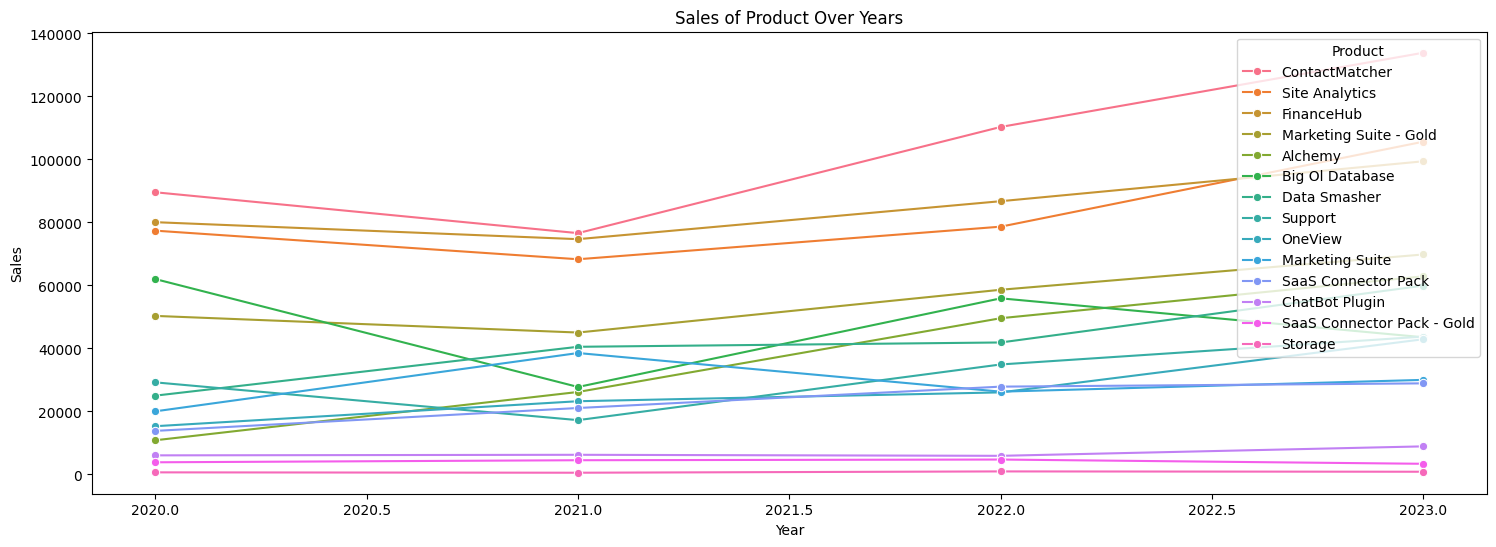

In [27]:
# PRODUCT SALES OVER TIME

# Grouping
sales_per_year = df.groupby(['year', 'product'])[['sales']].sum().sort_values(by='sales', ascending=False)

# Plotting
plt.figure(figsize=(18, 6))
sns.lineplot(data=sales_per_year, x='year', y='sales', hue='product', marker='o')
plt.title('Sales of Product Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Product', loc='upper right')
plt.show()


| Sales Trend    | Products                                  |
|----------------|-------------------------------------------|
| Increasing (5)     | ContactMatcher, Site Analytics, Data Smasher, Support, SaaS Connector Pack - Gold |
| Decreasing (5)     | FinanceHub, Marketing Suite, Alchemy, Big Ol Database, OneView |
| Fluctuating (4)   | Marketing Suite - Gold, ChatBot Plugin, SaaS Connector Pack, Storage |


## IV.III Customer Attributes Influence Analysis

### IV.III.I Customer influence on sales

In [28]:
# SALES CONTRIBUTION OF EACH CUSTOMER PER YEAR

# Grouping
customer_sales_per_year = df.groupby(['year', 'customer'])[['sales']].sum()

# Q3 for each year
Q3 = customer_sales_per_year['sales'].quantile(0.75)
Q1 = customer_sales_per_year['sales'].quantile(0.25)

# Filter the customers whose sales contribution is in the top 75%
top_customers_per_year = customer_sales_per_year[customer_sales_per_year['sales'] > Q3].sort_values(by=['year','sales'], ascending=False)
bottom_customers_per_year = customer_sales_per_year[customer_sales_per_year['sales']< Q1].sort_values(by=['year','sales'], ascending=False)
moderate_customers_per_year = customer_sales_per_year[(customer_sales_per_year['sales'] > Q1) & (customer_sales_per_year['sales'] < Q3) ].sort_values(by=['year','sales'], ascending=False)

# Show the DataFrame with the top customers contributing to the top 75% of sales per year
display(top_customers_per_year, bottom_customers_per_year, moderate_customers_per_year)



sales
year customer                             
2023 Trafigura Group            22084.9380
     Mondelez International     19963.6208
     UnitedHealth Group         18828.5130
     Bank of America Corp.      17424.5010
     Valero Energy              17004.9838
...                                    ...
2020 Itochu                      8538.2970
     BNP Paribas                 8491.3800
     HonHai Precision Industry   8217.4700
     Sony                        7929.7368
     Carrefour                   7782.2645

[99 rows x 1 columns]

sales
year customer                      
2023 Carrefour            2448.9420
     General Motors       2403.6590
     General Electric     2275.6840
     Goldman Sachs Group  2267.0015
     Gazprom              2134.8000
...                             ...
2020 Banco Santander       481.6840
     Humana                469.8760
     Procter & Gamble      316.5020
     Petrobras             110.9600
     Berkshire Hathaway     84.9090

[99 rows x 1 columns]

sales
year customer                      
2023 Johnson & Johnson     7402.490
     Walmart               7329.504
     Apple                 7262.362
     Bosch                 7133.391
     Pfizer                7089.228
...                             ...
2020 FedEx                 3232.872
     Prudential Financial  3217.528
     Oracle                3096.178
     Toyota Motor          2968.656
     Merck                 2958.796

[198 rows x 1 columns]

In [29]:
# GROUPING CUSTOMERS BASED ON THEIR SALES SEGMENTS THAT APPEARED EACH YEAR

# Filter for customers appearing in all years in bottom_customers_per_year
lower_customers_all_years = bottom_customers_per_year.groupby('customer').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

# Filter for customers appearing in all years in top_customers_per_year
higher_customers_all_years = top_customers_per_year.groupby('customer').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

# Show the DataFrame with the customers appearing in all years in moderate_level_sales_customers_per_year
moderate_level_sales_customers_per_year = moderate_customers_per_year.groupby('customer').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

display(lower_customers_all_years.index.get_level_values('customer').unique(), moderate_level_sales_customers_per_year.index.get_level_values('customer').unique(), higher_customers_all_years.index.get_level_values('customer').unique())



Index(['Gazprom'], dtype='object', name='customer')

Index(['Oracle', 'Apple', 'Nestle', 'CVS Health', 'State Farm Insurance Cos.',
       'Philip Morris International', 'Engie', 'United Parcel Service',
       'McKesson'],
      dtype='object', name='customer')

Index([], dtype='object', name='customer')

**Low level of sales by customer** presented by 'Gazprom' and it is the only customer consistently in the bottom 25% of total sales across all years, even though there are no customers consistently above 75% of total sales. 

**Moderate level of sales  by customer**, consist of the following customers:
1. Oracle:
Oracle had varying sales performance over the four years. Sales were moderate in 2020 and 2022, while showing a significant increase in 2021 and a slight decrease in 2023.

2. United Parcel Service (UPS):
UPS consistently demonstrated strong sales performance across all four years, with sales peaking in 2021 and 2022.

3. Engie:
Engie's sales remained relatively stable throughout the four years, with slight fluctuations but no significant upward or downward trends.

4. Philip Morris International:
Philip Morris International had moderate to high sales performance across all years, with sales peaking in 2021.

5. CVS Health:
CVS Health showed consistent sales growth over the four years, with sales steadily increasing from 2020 to 2021, slightly declining in 2022, and then rebounding in 2023.

6. Nestle:
Nestle's sales performance was relatively stable over the four years, with moderate fluctuations but no significant upward or downward trends.

7. Apple:
Apple had the highest sales in 2020 and 2023, with a significant decrease in sales in 2021, followed by a rebound in 2022.

8. State Farm Insurance Companies:
State Farm Insurance Companies' sales remained relatively consistent over the four years, with no significant upward or downward trends.

**High level of sales by customer**
There is no customers that consistently above 75% of total profit.

### IV.III.III Industry influence on sales

In [30]:
# # SALES CONTRIBUTION OF EACH INDUSTRY PER YEAR

# Grouping
industry_sales_per_year = df.groupby(['year', 'industry'])[['sales']].sum()

# Q3 for each year
Q3 = industry_sales_per_year['sales'].quantile(0.75)
Q1 = industry_sales_per_year['sales'].quantile(0.25)

# Filter the industries whose sales contribution is in the top 75%
top_industries_per_year = industry_sales_per_year[industry_sales_per_year['sales'] > Q3].sort_values(by=['year','sales'], ascending=False)
bottom_industries_per_year = industry_sales_per_year[industry_sales_per_year['sales']< Q1].sort_values(by=['year','sales'], ascending=False)
moderate_industries_per_year = industry_sales_per_year[(industry_sales_per_year['sales'] > Q1) & (industry_sales_per_year['sales'] < Q3) ].sort_values(by=['year','sales'], ascending=False)

# Show the DataFrame with the top industries contributing to the top 75% of sales per year
display(bottom_industries_per_year, top_industries_per_year ,moderate_industries_per_year)



sales
year industry                  
2023 Transportation  26978.0720
     Misc             5254.1120
2022 Transportation  18953.0420
     Misc            11337.3140
2021 Communications  25928.0165
     Transportation  23806.0396
     Misc             6937.3906
2020 Communications  21573.1470
     Transportation  20454.1740
     Misc             5062.9430

sales
year industry                  
2023 Finance        164788.8843
     Energy          96422.8463
     Manufacturing   94555.8376
     Tech            89059.0890
     Healthcare      79782.8290
2022 Finance        133391.9827
     Manufacturing   91601.0838
     Energy          80833.9770
2021 Finance         92726.5272
2020 Finance         83243.0902

sales
year industry                     
2023 Consumer Products  70179.5720
     Retail             69735.9360
     Communications     37189.8450
2022 Consumer Products  70023.3600
     Retail             61933.9080
     Healthcare         55146.6950
     Tech               48981.2395
     Communications     36271.2280
2021 Energy             69569.9150
     Healthcare         61351.9222
     Tech               54243.2724
     Manufacturing      51522.0368
     Consumer Products  42948.1102
     Retail             41499.2785
2020 Healthcare         76901.8420
     Tech               70885.4268
     Energy             57817.4026
     Manufacturing      57513.4230
     Retail             49902.9495
     Consumer Products  40893.1000

In [31]:
# Filter for industry appearing in all years in bottom_industries_per_year
lower_industries_all_years = bottom_industries_per_year.groupby('industry').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

# Filter for industry appearing in all years in top_indutries_per_year
higher_industries_all_years = top_industries_per_year.groupby('industry').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

# Show the DataFrame with the industry appearing in all years in moderate_level_sales_industrys_per_year
moderate_level_sales_industries_per_year = moderate_industries_per_year.groupby('industry').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

display(lower_industries_all_years.index.get_level_values('industry').unique(), moderate_level_sales_industries_per_year.index.get_level_values('industry').unique(), higher_industries_all_years.index.get_level_values('industry').unique())


Index(['Transportation', 'Misc'], dtype='object', name='industry')

Index(['Retail', 'Consumer Products'], dtype='object', name='industry')

Index(['Finance'], dtype='object', name='industry')

**Low Level of Sales by Industries:**
1. Transportation:
This industry consistently exhibited low levels of sales across all years. Transportation had total sales of $20,454.1740 in 2020, $23,806.0396 in 2021, $18,953.0420 in 2022, and $26,978.0720 in 2023.

2. Miscellaneous Industries:
Miscellaneous had total sales of $5,062.9430 in 2020, $6,937.3906 in 2021, $11,337.3140 in 2022, and $5,254.1120 in 2023 and presented consistently the low levels of sales across all years. 

**Moderate Level of Sales by Industries:**
1. Retail Industry:
The Retail industry exhibited moderate levels of sales across all years. Total sales were $49,847.4495 in 2020, $41,499.2785 in 2021, $61,854.1080 in 2022, and $69,664.5640 in 2023. These figures indicate a relatively stable sales performance for the Retail industry over the four-year period, with moderate fluctuations but no significant upward or downward trends.

2. Consumer Products Industry:
Total sales for Customer Industry were $40,893.1000 in 2020, $41,903.4802 in 2021, $70,023.3600 in 2022, and $70,179.5720 in 2023. These figures suggest a relatively stable sales performance for the Consumer Products industry over the four-year period, with moderate fluctuations but no significant upward or downward trends.

**High Level of Sales by Industries:**
1. Finance Industry:
The Finance industry consistently exhibited high levels of sales across all years, with total sales increasing significantly from $79,284.0262 in 2020 to $164,788.8843 in 2023. These figures indicate that the Finance industry consistently performed above the 75th percentile of total sales across all years.


### IV.III.III Segment influence on sales

In [32]:
# sales contribution of each segment per year
segment_sales_per_year = df.groupby(['year', 'segment'])[['sales']].sum()

# Q3 for each year
Q3 = segment_sales_per_year['sales'].quantile(0.75)
Q1 = segment_sales_per_year['sales'].quantile(0.25)

# Filter the industries whose sales contribution is in the top 75%
top_segment_per_year = segment_sales_per_year[segment_sales_per_year['sales'] > Q3].sort_values(by=['year','sales'], ascending=False)
bottom_segment_per_year = segment_sales_per_year[segment_sales_per_year['sales']< Q1].sort_values(by=['year','sales'], ascending=False)
moderate_segment_per_year = segment_sales_per_year[(segment_sales_per_year['sales'] > Q1) & (segment_sales_per_year['sales'] < Q3) ].sort_values(by=['year','sales'], ascending=False)

# Show the DataFrame with the top industries contributing to the top 75% of sales per year
display(bottom_segment_per_year, top_segment_per_year ,moderate_segment_per_year)



,,sales
year,segment,
2022,Enterprise,105235.3370
2021,Enterprise,75239.2688
2020,Enterprise,89715.8118


,,sales
year,segment,
2023,SMB,332473.0599
2022,SMB,296295.5392
2021,SMB,266535.9333


sales
year segment                
2023 Strategic   242011.2324
     Enterprise  159462.7309
2022 Strategic   206942.9538
2021 Strategic   128757.3069
2020 SMB         266096.8126
     Strategic   128434.8737

In [33]:
# Filter for Segment appearing in all years in bottom_segment_per_year
lower_segment_all_years = bottom_segment_per_year.groupby('segment').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

# Filter for Segment appearing in all years in top_indutries_per_year
higher_segment_all_years = top_segment_per_year.groupby('segment').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

# Show the DataFrame with the Segment appearing in all years in moderate_level_sales_industrys_per_year
moderate_level_sales_segment_per_year = moderate_segment_per_year.groupby('segment').filter(lambda x: x.index.get_level_values('year').nunique() == len(df['year'].unique())).sort_values(by='year')

display(lower_segment_all_years, moderate_level_sales_segment_per_year, higher_segment_all_years)


,,sales
year,segment,


,,sales
year,segment,
2020,Strategic,128434.8737
2021,Strategic,128757.3069
2022,Strategic,206942.9538
2023,Strategic,242011.2324


,,sales
year,segment,


**Low Level of Sales by Industries:**
based on the provided dataset, there is no specific segment listed under the category of "low level of sales." 

**Moderate Level of Sales by Industries:**

Strategic:
The one and only segment exhibited moderate levels of sales across all years is strategic that have total sales were around $12,000 in 2020 and in 2021 respectively, and increased dramatically in 2022 and 2023 more than about $20,000. These figures indicate a relatively stable sales performance for the Strategic segment over the four-year period, with moderate fluctuations with significant upward trends.


**High Level of Sales by Industries:**
based on the provided dataset, there is no specific segment listed under the category of "high level of sales." 


## IV.IV Geographical Influence Analysis



### IV.IV.I Sales and Profit based on Region and Subregion

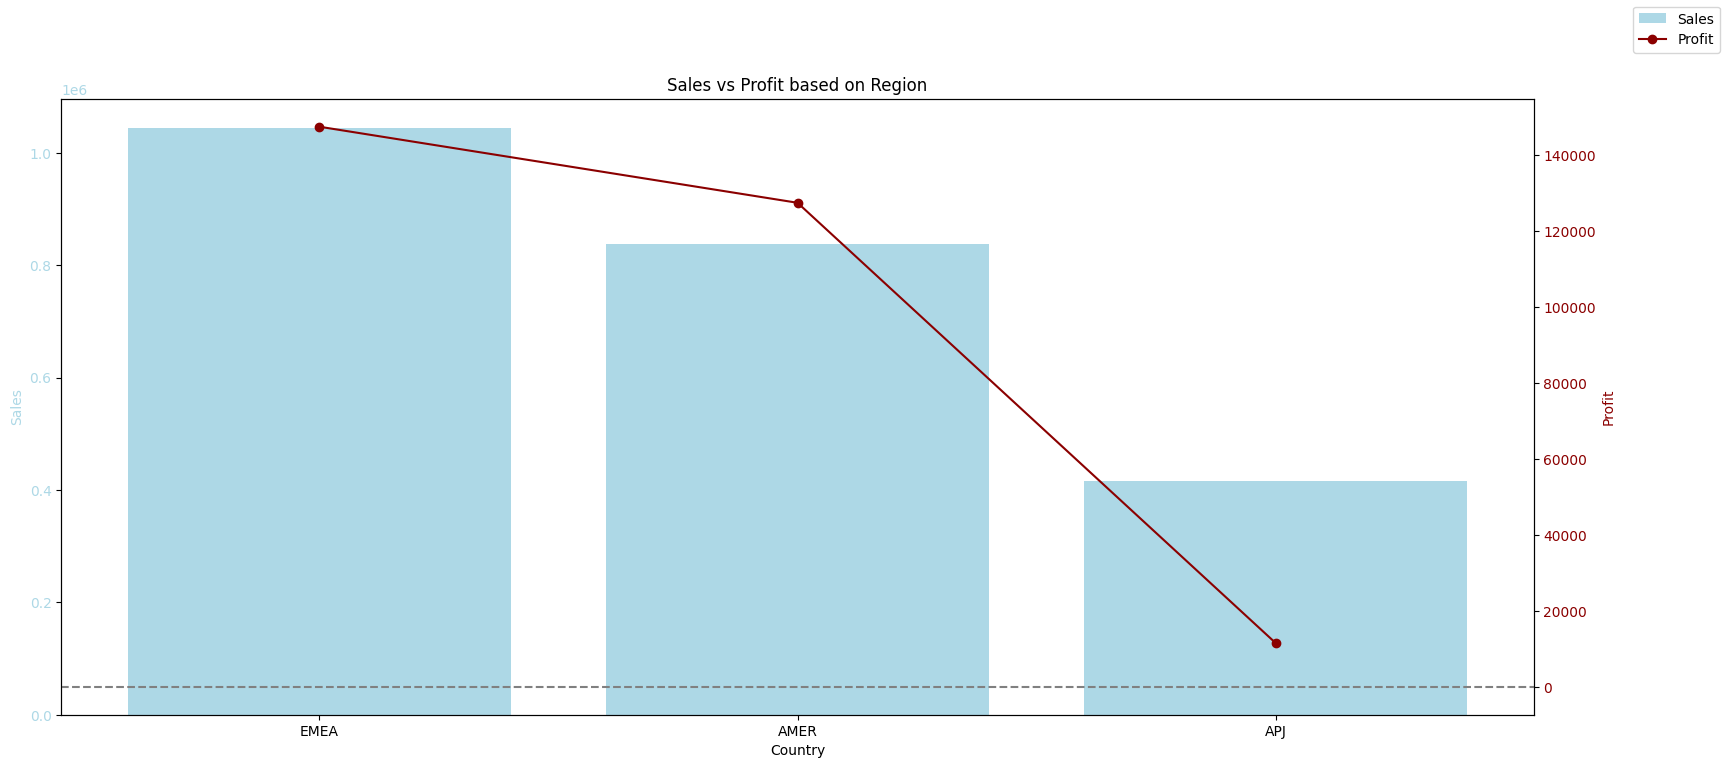

In [34]:
# SALES AND PROFIT BY REGION

# Grouping
sales_region= df.groupby(['region'])[['sales']].sum().sort_values(by=['sales'], ascending=False).head(10)
profit_region= df.groupby(['region'])[['profit']].sum().sort_values(by=['profit'], ascending=False).head(10)

merged_data = sales_region.merge(profit_region, left_index=True, right_index=True, suffixes=('_sales', '_profit'))

# Plotting
fig, ax1 = plt.subplots(figsize=(19, 8))
ax1.bar(merged_data.index, merged_data['sales'], color='lightblue', label='Sales')
ax1.set_ylabel('Sales', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_xlabel('Country')
ax1.set_title('Sales vs Profit based on Region')

ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['profit'], color='darkred', label='Profit', marker='o')
ax2.set_ylabel('Profit', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.axhline(y=0, color='grey', linestyle='--')


fig.legend(loc='upper right')
plt.show()

**Sales by Region:**
- EMEA (Europe, Middle East, and Africa) region has the highest total sales, amounting to approximately $1,036,977.
- Following EMEA, the AMER (Americas) region shows substantial sales, totaling around $833,286.
- The APJ (Asia-Pacific and Japan) region has comparatively lower sales, standing at approximately $415,393.

**Profit by Region:**
- EMEA region also leads in terms of profit generation, with a total profit of approximately $148,972.
- AMER region follows closely with a profit of around $126,924.
- APJ region has the lowest profit among the three regions, with approximately $11,642.

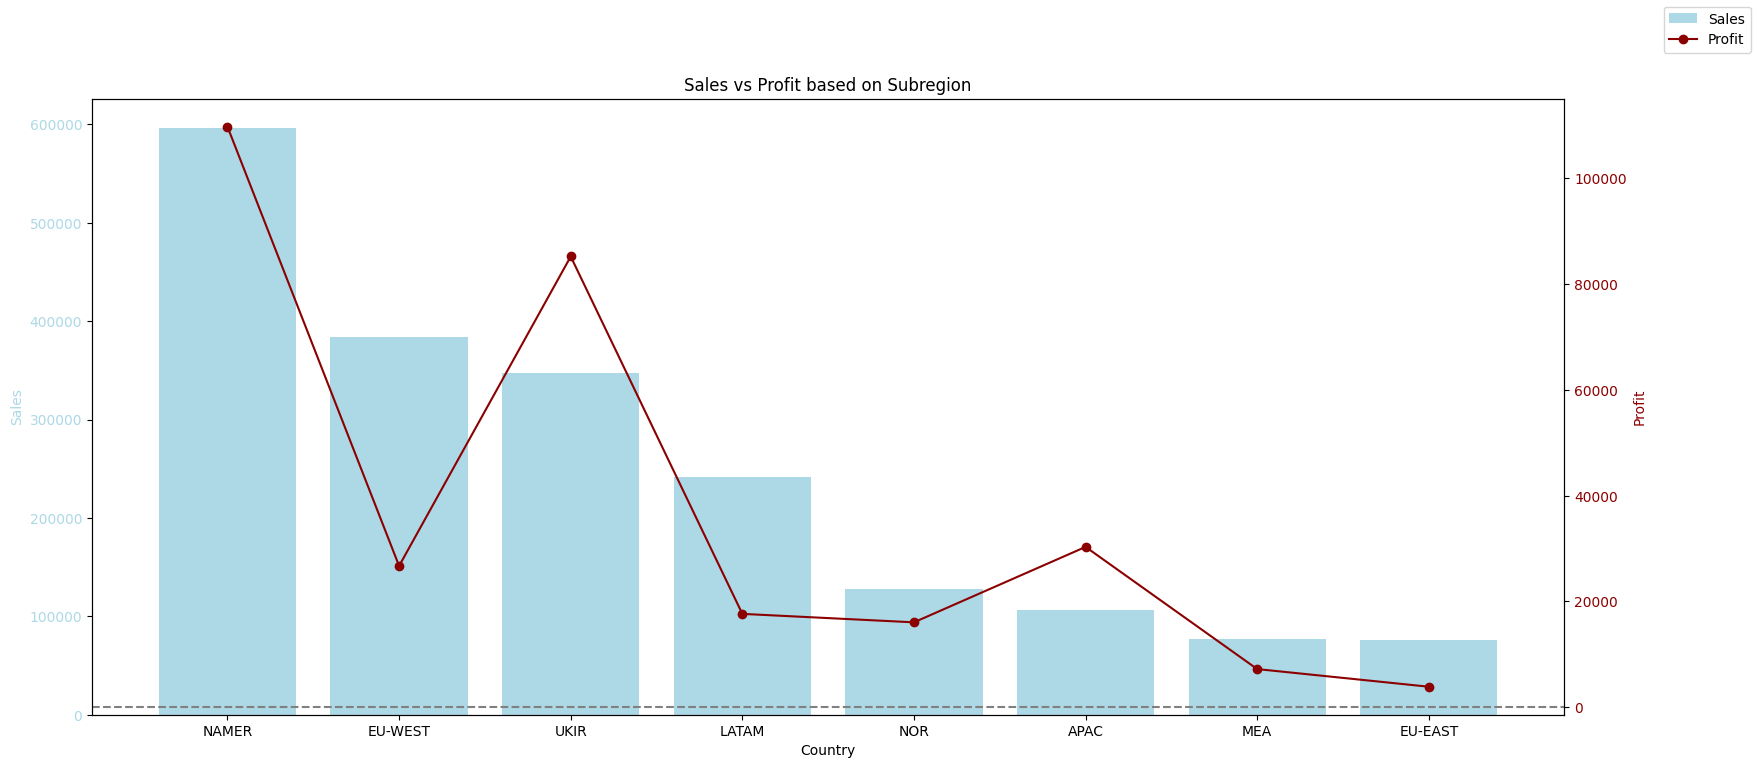

In [35]:
# SALES AND PROFIT BY SUBREGION

# Grouping
sales_subregion= df.groupby(['subregion'])[['sales']].sum().sort_values(by=['sales'], ascending=False).head(10)
profit_subsubregion= df.groupby(['subregion'])[['profit']].sum().sort_values(by=['profit'], ascending=False).head(10)

merged_data = sales_subregion.merge(profit_subsubregion, left_index=True, right_index=True, suffixes=('_sales', '_profit'))

# Plotting
fig, ax1 = plt.subplots(figsize=(19, 8))
ax1.bar(merged_data.index, merged_data['sales'], color='lightblue', label='Sales')
ax1.set_ylabel('Sales', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_xlabel('Country')
ax1.set_title('Sales vs Profit based on Subregion')

ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['profit'], color='darkred', label='Profit', marker='o')
ax2.set_ylabel('Profit', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.axhline(y=0, color='grey', linestyle='--')


fig.legend(loc='upper right')
plt.show()

**Sales by Subregion:**
- NAMER (North America) exhibits the highest sales, with approximately $591,845.
- Following NAMER, EU-WEST (Western Europe) and UKIR (United Kingdom and Ireland) regions show significant sales, with approximately $379,931 and $346,474 respectively.
- Other notable sales figures include LATAM (Latin America) with around $241,441 and JAPN (Japan) with approximately $170,117.

**Profit by Subregion:**
- NAMER also leads in terms of profit generation, with a total profit of approximately $109,302.
- UKIR follows closely with a profit of around $84,977.
- APAC (Asia-Pacific), EU-WEST, and IND (India) regions also show notable profits, with approximately $30,311, $28,753, and $18,383 respectively.

### IV.IV.II Sales and Profit based on Country and City

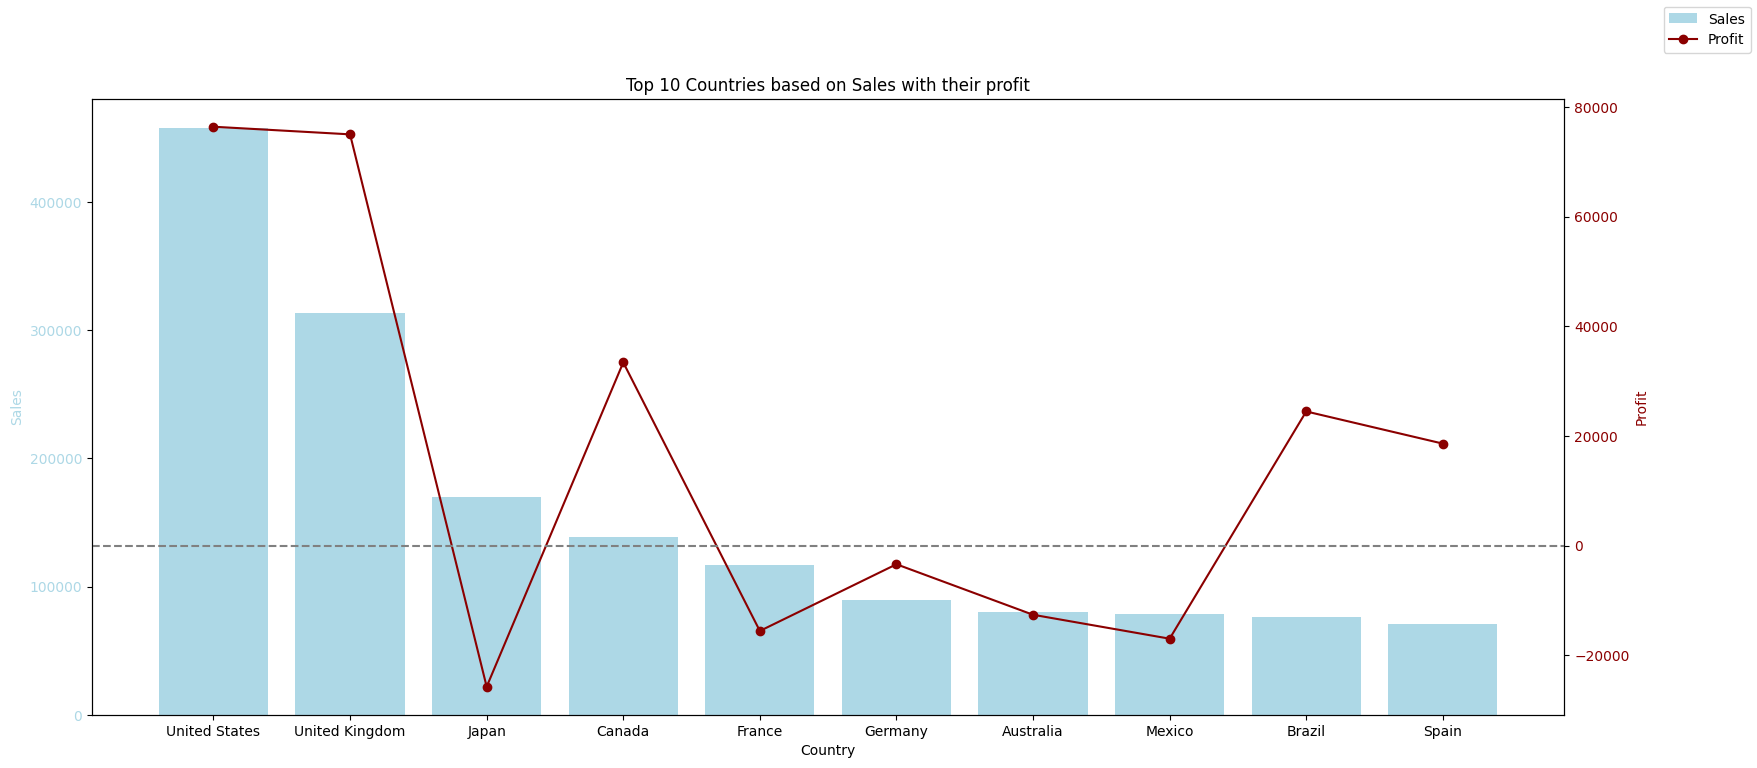

In [36]:
# TOP 10 COUNTRIES BASED ON THEIR SALES WITH ITS PROFIT

sales_country = df.groupby(['country'])[['sales']].sum().sort_values(by=['sales'], ascending=False).head(10)
profit_country = df.groupby(['country'])[['profit']].sum().sort_values(by=['profit'], ascending=False)

# Merge sales and profit data based on top 10 countries
merged_data = sales_country.merge(profit_country, left_index=True, right_index=True, suffixes=('_sales', '_profit'))

# Plotting
fig, ax1 = plt.subplots(figsize=(19, 8))
ax1.bar(merged_data.index, merged_data['sales'], color='lightblue', label='Sales')
ax1.set_ylabel('Sales', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_xlabel('Country')
ax1.set_title('Top 10 Countries based on Sales with their profit')

ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['profit'], color='darkred', label='Profit', marker='o')
ax2.set_ylabel('Profit', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.axhline(y=0, color='grey', linestyle='--')


fig.legend(loc='upper right')
plt.show()


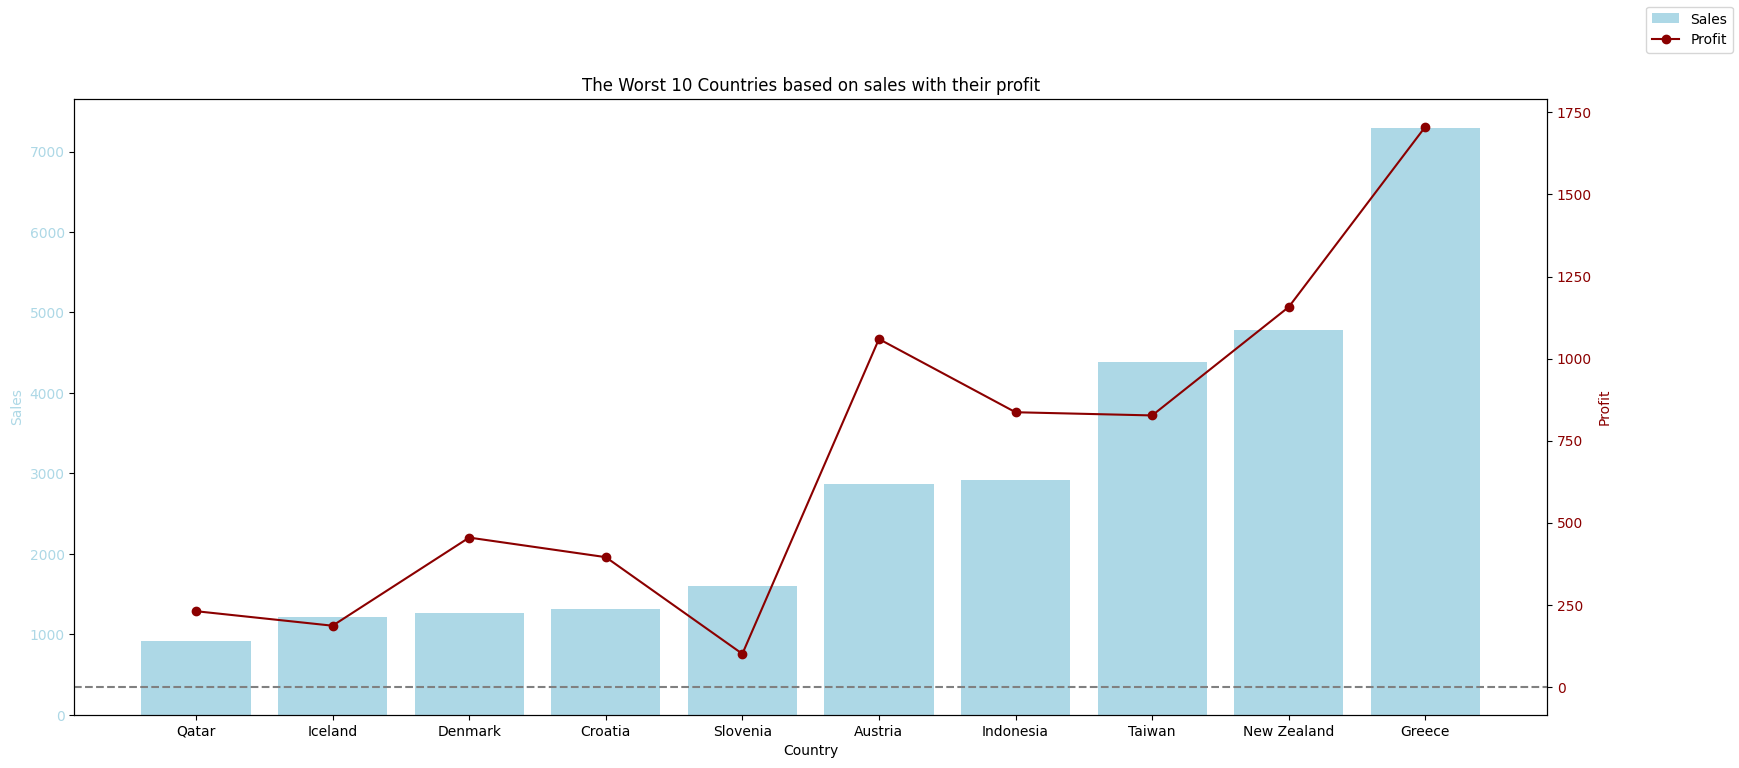

In [37]:
# # WORST 10 COUNTRIES BASED ON THEIR SALES WITH ITS PROFIT
sales_country= df.groupby(['country'])[['sales']].sum().sort_values(by=['sales'], ascending=True).head(10)
profit_country = df.groupby(['country'])[['profit']].sum().sort_values(by=['profit'], ascending=True)

# Merge sales and profit data based on top 10 countries
merged_data = sales_country.merge(profit_country, left_index=True, right_index=True, suffixes=('_sales', '_profit'))

# Plotting
fig, ax1 = plt.subplots(figsize=(19, 8))
ax1.bar(merged_data.index, merged_data['sales'], color='lightblue', label='Sales')
ax1.set_ylabel('Sales', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_xlabel('Country')
ax1.set_title('The Worst 10 Countries based on sales with their profit')

ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['profit'], color='darkred', label='Profit', marker='o')
ax2.set_ylabel('Profit', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.axhline(y=0, color='grey', linestyle='--')


fig.legend(loc='upper right')
plt.show()


**Lowest Sales by Country:**
- Qatar, Iceland, Denmark, Croatia, and Slovenia represent the bottom five countries in terms of sales.
- These countries have relatively low sales figures, ranging from approximately $920 to $1,603.
- Austria, Indonesia, Taiwan, New Zealand, and Greece demonstrate slightly higher sales, ranging from approximately $2,865 to $7,293.


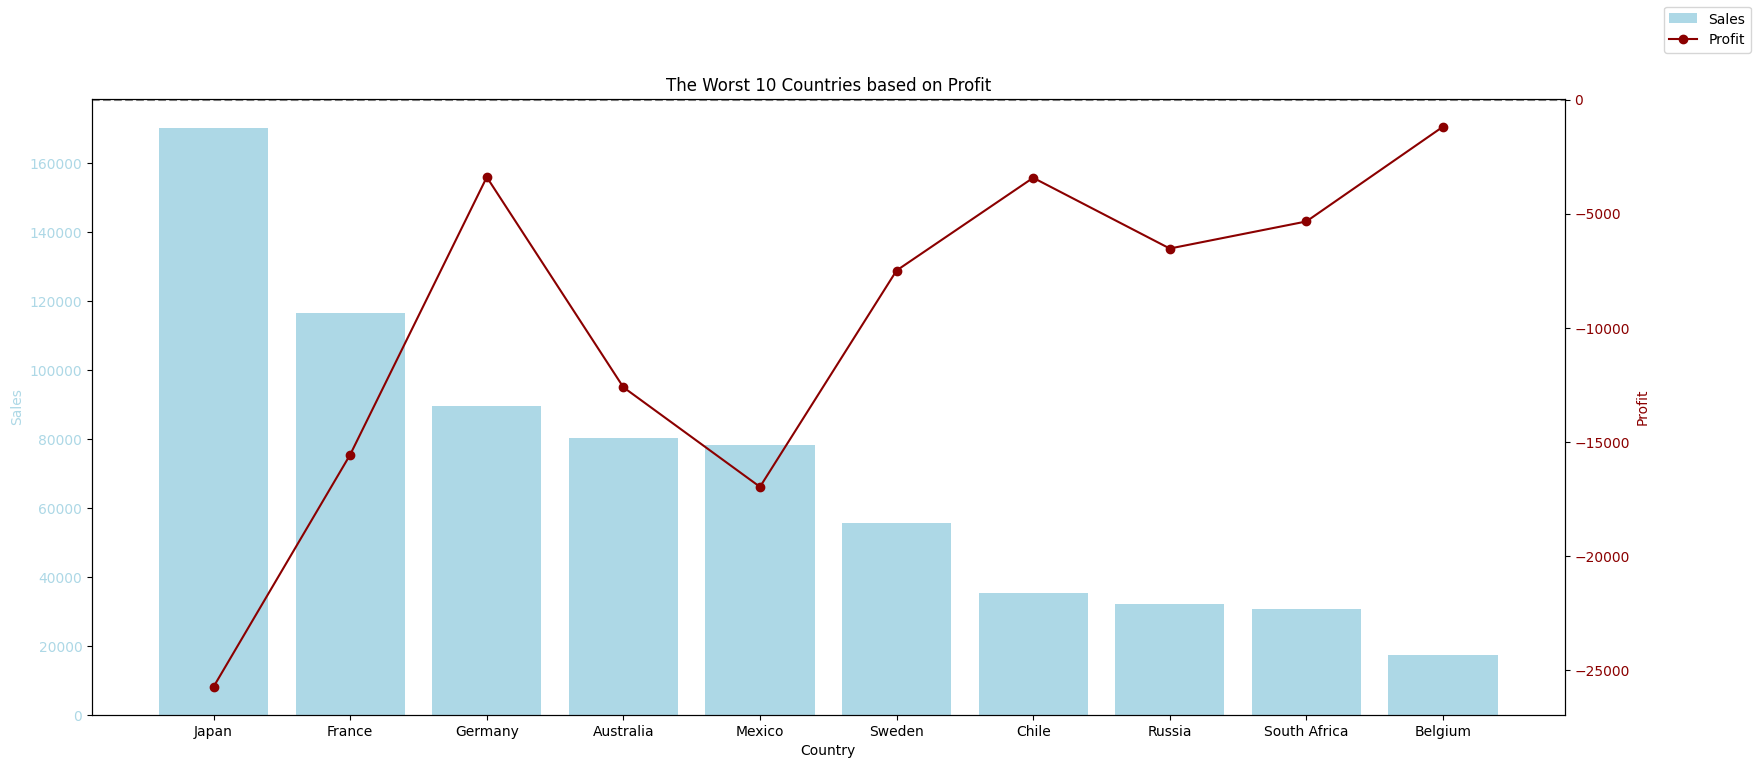

In [38]:
#  WORST 10 COUNTRY BASED ON PROFIT AND ITS SALES

# Grouping
profit_country= df.groupby(['country'])[['profit']].sum().sort_values(by=['profit'], ascending=True).head(10)
sales_country = df.groupby(['country'])[['sales']].sum().sort_values(by=['sales'], ascending=False)

merged_data = sales_country.merge(profit_country, left_index=True, right_index=True, suffixes=('_sales', '_profit'))

# Plotting
fig, ax1 = plt.subplots(figsize=(19, 8))
ax1.bar(merged_data.index, merged_data['sales'], color='lightblue', label='Sales')
ax1.set_ylabel('Sales', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_xlabel('Country')
ax1.set_title('The Worst 10 Countries based on Profit')

ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['profit'], color='darkred', label='Profit', marker='o')
ax2.set_ylabel('Profit', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.axhline(y=0, color='grey', linestyle='--')


fig.legend(loc='upper right')
plt.show()


The data showed significant disparities between sales and profitability across various countries. Japan and France lead in sales but suffer substantial losses, indicating potential inefficiencies. Despite moderate sales, Germany and Australia also experience notable losses, suggesting room for cost optimization. Mexico's high sales are overshadowed by significant losses, signaling challenges in pricing strategies. Lower sales and losses are observed in Sweden, Chile, Russia, South Africa, and Belgium potentially reflecting smaller markets.

### IV.IV.III MINIMIZE LOSSSES WITH CHANGING THE BIGGEST DISCOUNT TO THE NEW ONE

In [40]:
# COUNTRY WITH BEST SALES AND WORST PROFIT

# PICK COOUNTRY FROM DATASET
df_japan = df[(df['country']=='Japan')]
df_france = df[(df['country']=='France')]
df_germany = df[(df['country']=='Germany')]
df_mexico = df[(df['country']=='Mexico')]

# FILTER THE DATA WITH THEIR BIGGEST DISCOUNT
df_japan_disc_80 = df[(df['country'] == 'Japan') & (df['discount'] == 0.8)]
df_france_disc_70 = df[(df['country'] == 'France') & (df['discount'] == 0.7)]
df_germany_disc_70 = df[(df['country'] == 'Germany') & (df['discount'] == 0.7)]
df_mexico_disc_70 = df[(df['country'] == 'Mexico') & (df['discount'] == 0.7)]

# FORMULA TO GET NEW MAX DISCOUNT
min_sales_japan = 1 / 0.35 * df_japan_disc_80['sales'].sum() # max 0%
min_sales_france = 0.7 / 0.35 * df_france_disc_70['sales'].sum() # max 30%
min_sales_germany = 0.6 / 0.35 * df_germany_disc_70['sales'].sum() # max 40%
min_sales_mexico = 0.8 / 0.35 * df_mexico_disc_70['sales'].sum() # max 20%


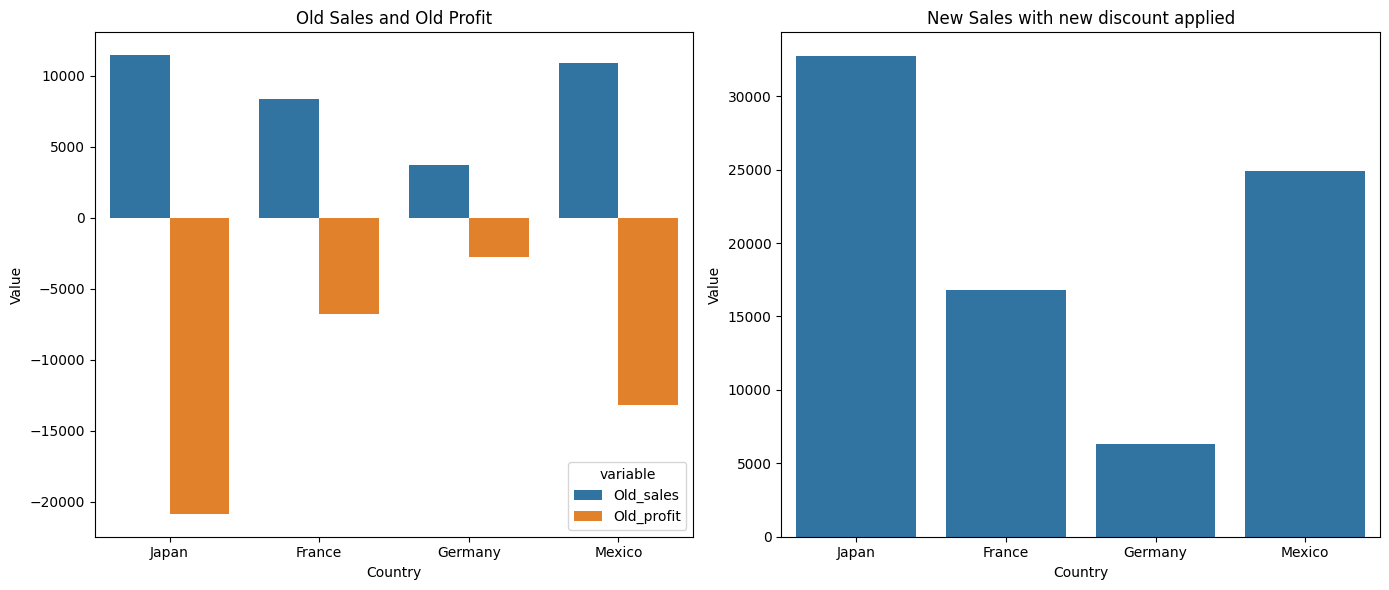

,Country,Old_sales,Old_profit,New_sales
0,Japan,11450.490,-20852.2963,32715.685714
1,France,8399.775,-6790.2206,16799.550000
2,Germany,3690.498,-2760.7304,6326.568000
3,Mexico,10895.325,-13171.6128,24903.600000


In [46]:
old_sales_japan = df_japan_disc_80['sales'].sum()
old_sales_france = df_france_disc_70['sales'].sum()
old_sales_germany = df_germany_disc_70['sales'].sum()
old_sales_mexico = df_mexico_disc_70['sales'].sum()

old_profit_japan = df_japan_disc_80['profit'].sum()
old_profit_france = df_france_disc_70['profit'].sum()
old_profit_germany = df_germany_disc_70['profit'].sum()
old_profit_mexico = df_mexico_disc_70['profit'].sum()

# Define the data
sales_difference = pd.DataFrame({
    'Country': ['Japan', 'France', 'Germany', 'Mexico'],
    'Old_sales': [old_sales_japan, old_sales_france, old_sales_germany, old_sales_mexico],
    'Old_profit': [old_profit_japan, old_profit_france, old_profit_germany, old_profit_mexico],
    'New_sales': [min_sales_japan, min_sales_france, min_sales_germany, min_sales_mexico]
})


# Set the figure size
plt.figure(figsize=(14, 6))

# Plot Old Sales and Old Profit
plt.subplot(1, 2, 1)
sns.barplot(x='Country', y='value', hue='variable', data=pd.melt(sales_difference, id_vars='Country', value_vars=['Old_sales', 'Old_profit']))
plt.title('Old Sales and Old Profit')
plt.ylabel('Value')
plt.xlabel('Country')

# Plot New Sales
plt.subplot(1, 2, 2)
sns.barplot(x='Country', y='New_sales', data=sales_difference)
plt.title('New Sales with new discount applied')
plt.ylabel('Value')
plt.xlabel('Country')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()
sales_difference

When the old sales with high discounts (80%, 70%, 70%, 70%) applied in Japan, France, Germany, and Mexico respectively, the profit showed the reverse. Despite high sales, profits were significantly negative due to excessive discounts. The right plot demonstrates the impact of new, lower discounts (0%, 30%, 40%, 20%). Sales in Japan remained high, while France, Germany, and Mexico saw reduced sales but positive profits, indicating a more balanced discount strategy that sustains profitability.

___

<div style="text-align: center;">
    <h1><strong>SUMMARY</strong></h1>

## **Analysis**

**Variable Correlation Analysis**:
- Sales and Profit Correlation: There is a strong positive correlation between sales and profit, indicating that as sales increase, profit tends to increase as well. This suggests that efforts to boost sales will likely enhance profitability.
- Discount Impact: Discounts have a mixed impact on sales and profit. While they can boost sales volume, they may reduce overall profitability if not managed carefully.

**Product Influence Analysis**:
- High-Growth Products: Certain products like "Marketing Suite" and "FinanceHub" show high sales and profit margins, indicating strong market demand.
- Low-Performance Products: Products with consistently low sales and profit should be re-evaluated. They may need marketing improvements or even discontinuation if they fail to meet performance benchmarks.

**Customer Attributes Influence Analysis**:
- High-Impact Customers: Identifying top customers who contribute significantly to sales can help tailor marketing and retention strategies to maintain and grow these relationships.
- Low-Impact Customers: Understanding customers with minimal impact can help in either converting them into high-value customers through targeted strategies or reducing efforts spent on them.

**Geographical Influence Analysis:**
- Region-Based Performance: Sales performance varies significantly across different regions. For example, regions like EMEA (Europe, the Middle East, and Africa) and North America show strong sales, while others may need focused strategies to improve performance.
- City-Level Insights: Within high-performing regions, certain cities like Dublin and London are key contributors. Focusing on these cities with targeted campaigns can further enhance sales.

**Recommendations**

**Optimize Pricing Strategies:**
- Dynamic Pricing: Implement dynamic pricing strategies that adjust prices based on demand, competition, and other factors. Use data analytics to determine optimal pricing points that maximize both sales and profit.
- Discount Management: Carefully manage discount strategies to ensure they boost sales without significantly cutting into profit margins. Analyze the impact of different discount levels and adjust accordingly.

**Product Strategy:**
- Focus on High-Growth Products: Invest in marketing and development for high-growth products to maximize their potential. Consider expanding the product line or adding complementary features to enhance value.
- Re-evaluate Low-Performance Products: Conduct a detailed analysis of low-performing products to understand the reasons for their poor performance. Consider discontinuing products that do not show potential for improvement.

**Customer Relationship Management:**

- Enhance Key Customer Relationships: Develop personalized marketing and retention strategies for high-impact customers to maintain and grow these valuable relationships.
- Convert Low-Impact Customers: Use targeted marketing campaigns to convert low-impact customers into higher-value ones. Offer incentives and promotions tailored to their needs and preferences.

**Geographical Targeting:**
- Region-Specific Strategies: Develop tailored strategies for different regions based on their performance. For high-performing regions, focus on maintaining and growing sales. For lower-performing regions, identify barriers and develop strategies to overcome them.
- City-Level Focus: Within key regions, focus on high-performing cities with targeted marketing campaigns and localized promotions to further boost sales.